In [6]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display matplotlib plots inline with the Jupyter Notebook
%matplotlib inline

In [8]:
import pandas as pd

# Load the data from a CSV file with ISO-8859-1 encoding
file_path = 'pls_fy21_outlet_pud21i.csv'  
data_iso = pd.read_csv(file_path, encoding='ISO-8859-1')
print("Data loaded using ISO-8859-1 encoding.")

# Load the data from the same CSV file with cp1252 encoding
data_cp1252 = pd.read_csv(file_path, encoding='cp1252')
print("Data loaded using cp1252 encoding.")

# Display the first few rows of each DataFrame to verify
print("Data loaded using ISO-8859-1 encoding:")
print(data_iso.head())

print("\nData loaded using cp1252 encoding:")
print(data_cp1252.head())


Data loaded using ISO-8859-1 encoding.
Data loaded using cp1252 encoding.
Data loaded using ISO-8859-1 encoding:
  STABR FSCSKEY  FSCS_SEQ C_FSCS       LIBID  \
0    AK  AK0001         2      Y  AK0001-002   
1    AK  AK0002         7      Y  AK0002-007   
2    AK  AK0002         8      Y  AK0002-008   
3    AK  AK0002        10      Y  AK0002-010   
4    AK  AK0002        11      Y  AK0002-011   

                            LIBNAME                        ADDRESS  \
0       ANCHOR POINT PUBLIC LIBRARY          34020 NORTH FORK ROAD   
1       CHUGIAK-EAGLE RIVER LIBRARY  12001 BUSINESS BOULEVARD #176   
2                   MULDOON LIBRARY   1251 MULDOON ROAD, SUITE 158   
3  SCOTT AND WESLEY GERRISH LIBRARY               250 EGLOFF DRIVE   
4             Z. J. LOUSSAC LIBRARY             3600 DENALI STREET   

           CITY    ZIP  ZIP4  ... CENTRACT  CENBLOCK CDCODE   CBSA MICROF  \
0  ANCHOR POINT  99556  9150  ...     8.00      3027    200     -4      N   
1   EAGLE RIVER  99577 

In [10]:
# Data Cleaning
# Checking for missing values
print(data_iso.isnull().sum())

STABR        0
FSCSKEY      0
FSCS_SEQ     0
C_FSCS       0
LIBID        0
LIBNAME      0
ADDRESS      0
CITY         0
ZIP          0
ZIP4         0
CNTY         0
PHONE        0
C_OUT_TY     0
SQ_FEET      0
F_SQ_FT      0
L_NUM_BM     0
HOURS        0
F_HOURS      0
WKS_OPEN     0
F_WKSOPN     0
YR_SUB       0
OBEREG       0
STATSTRU     0
STATNAME     0
STATADDR     0
LONGITUD     0
LATITUDE     0
INCITSST     0
INCITSCO     0
GNISPLAC     0
CNTYPOP      0
LOCALE       0
CENTRACT     0
CENBLOCK     0
CDCODE       0
CBSA         0
MICROF       0
GEOSTATUS    0
GEOSCORE     0
GEOMTYPE     0
C19WKSCL     0
C19WKSLO     0
dtype: int64


In [14]:
# 'data' is your DataFrame
print("Data types before conversion:")
print(data_iso.dtypes)  # This will show the current data types of all columns

# Convert columns that should be numeric but are object types
numeric_columns = ['HOURS', 'SQ_FEET', 'CNTYPOP']  # List columns that should be numeric
for col in numeric_columns:
    data_iso[col] = pd.to_numeric(data_iso[col], errors='coerce')  # 'coerce' will set errors to NaN

print("\nData types after attempted conversion:")
print(data_iso.dtypes)  # Check if the types have changed as expected

# Check for non-numeric values that couldn't be converted
print("\nNon-numeric entries after conversion attempt:")
for col in numeric_columns:
    non_numeric = data_iso[pd.to_numeric(data_iso[col], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Column '{col}' contains non-numeric data:")
        print(non_numeric[col].unique())

Data types before conversion:
STABR         object
FSCSKEY       object
FSCS_SEQ       int64
C_FSCS        object
LIBID         object
LIBNAME       object
ADDRESS       object
CITY          object
ZIP            int64
ZIP4          object
CNTY          object
PHONE          int64
C_OUT_TY      object
SQ_FEET        int64
F_SQ_FT       object
L_NUM_BM       int64
HOURS          int64
F_HOURS       object
WKS_OPEN       int64
F_WKSOPN      object
YR_SUB         int64
OBEREG         int64
STATSTRU       int64
STATNAME       int64
STATADDR       int64
LONGITUD     float64
LATITUDE     float64
INCITSST       int64
INCITSCO       int64
GNISPLAC      object
CNTYPOP        int64
LOCALE         int64
CENTRACT     float64
CENBLOCK       int64
CDCODE         int64
CBSA           int64
MICROF        object
GEOSTATUS     object
GEOSCORE     float64
GEOMTYPE      object
C19WKSCL       int64
C19WKSLO       int64
dtype: object

Data types after attempted conversion:
STABR         object
FSCSKEY      

In [15]:
# Data Exploration
# Describe data to get basic statistical details
print(data_iso.describe())

           FSCS_SEQ           ZIP         PHONE        SQ_FEET      L_NUM_BM  \
count  17426.000000  17426.000000  1.742600e+04   17426.000000  17426.000000   
mean       7.749971  48942.217089  5.670397e+09   12315.478940      0.029094   
std       19.887421  28692.503786  2.386492e+09   25412.900824      0.293228   
min        1.000000    802.000000 -4.000000e+00      -4.000000     -3.000000   
25%        2.000000  25506.500000  3.342336e+09    2500.000000      0.000000   
50%        2.000000  48836.500000  5.854288e+09    6300.000000      0.000000   
75%        7.000000  71859.250000  7.812370e+09   14200.000000      0.000000   
max      427.000000  99950.000000  9.899834e+09  970000.000000     16.000000   

              HOURS      WKS_OPEN   YR_SUB        OBEREG      STATSTRU  ...  \
count  17426.000000  17426.000000  17426.0  17426.000000  17426.000000  ...   
mean    1592.885344     39.267589   2022.0      4.286870      0.561001  ...   
std      936.251355     17.313030      0.0

In [17]:
# Analysis
# Analyzing library services by county
library_by_county = data_iso.groupby('CNTY')['LIBNAME'].count()
print(library_by_county)

CNTY
ABBEVILLE         3
ACADIA            7
ACCOMACK          2
ADA              18
ADAIR             9
                 ..
YOUNG             2
YUBA              1
YUKON-KOYUKUK    11
YUMA             11
ZAPATA            1
Name: LIBNAME, Length: 1813, dtype: int64


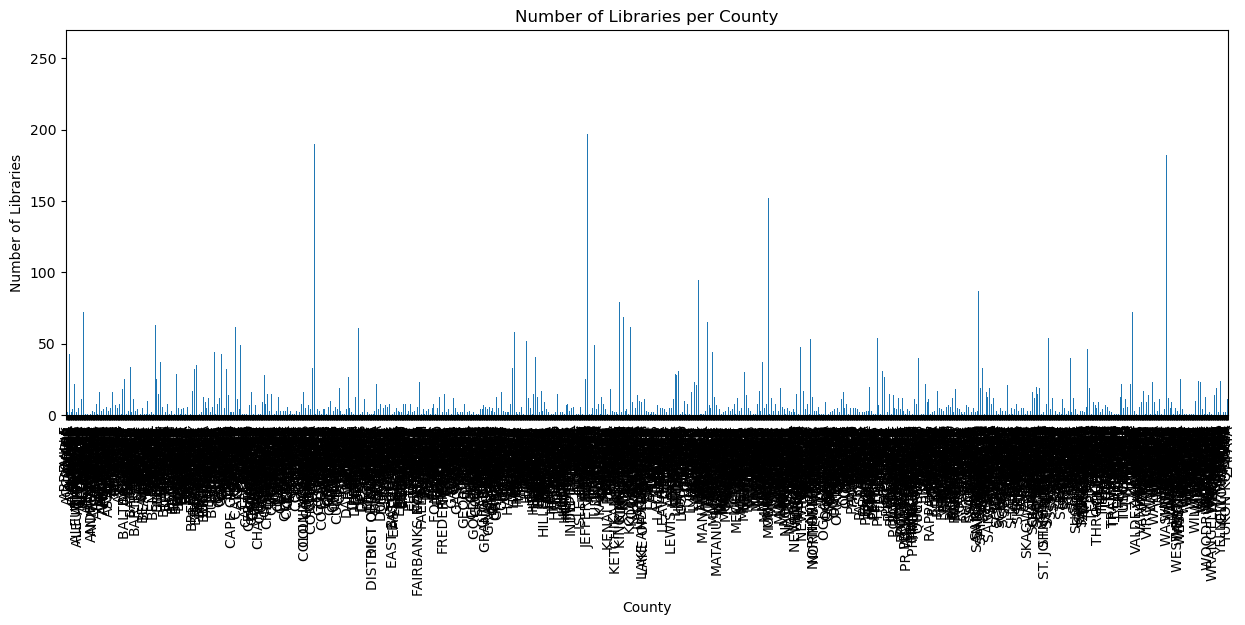

In [18]:
 #Visualization
# Plotting the number of libraries per county
plt.figure(figsize=(15, 5))
library_by_county.plot(kind='bar')
plt.title('Number of Libraries per County')
plt.xlabel('County')
plt.ylabel('Number of Libraries')
plt.show()

C:\Users\saikr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



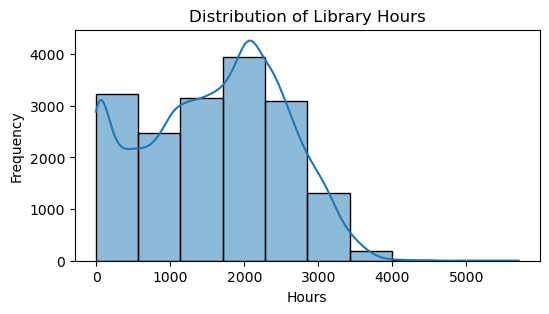

C:\Users\saikr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



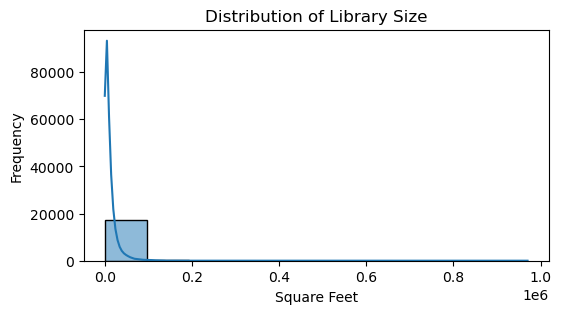

C:\Users\saikr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



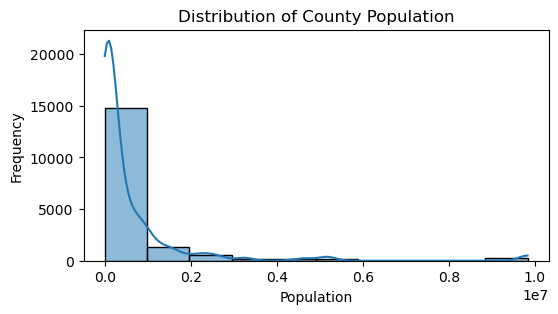

In [35]:
# Histograms of Numeric Columns
plt.figure(figsize=(6, 3))
sns.histplot(data_iso['HOURS'], bins=10, kde=True)
plt.title('Distribution of Library Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data_iso['SQ_FEET'], bins=10, kde=True)
plt.title('Distribution of Library Size')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(data_iso['CNTYPOP'], bins=10, kde=True)
plt.title('Distribution of County Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

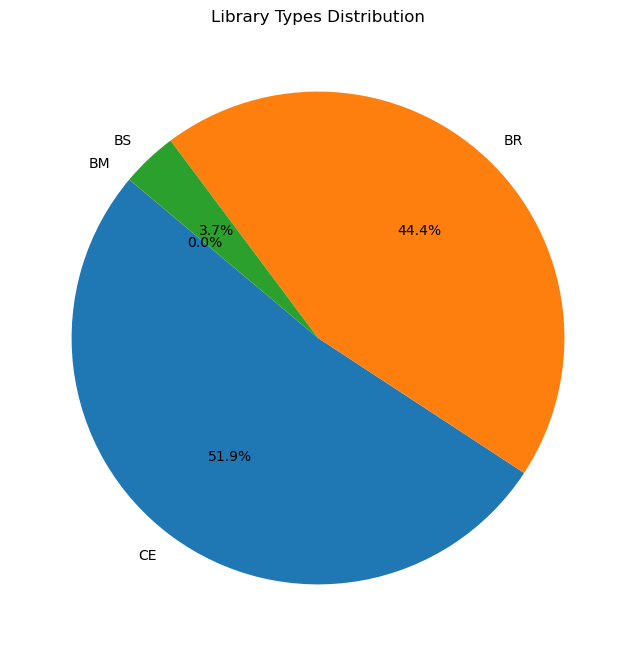

In [32]:
# Pie Chart of Library Types
plt.figure(figsize=(8, 8))
library_type_counts = data_iso['C_OUT_TY'].value_counts()
plt.pie(library_type_counts, labels=library_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Library Types Distribution')
plt.show()

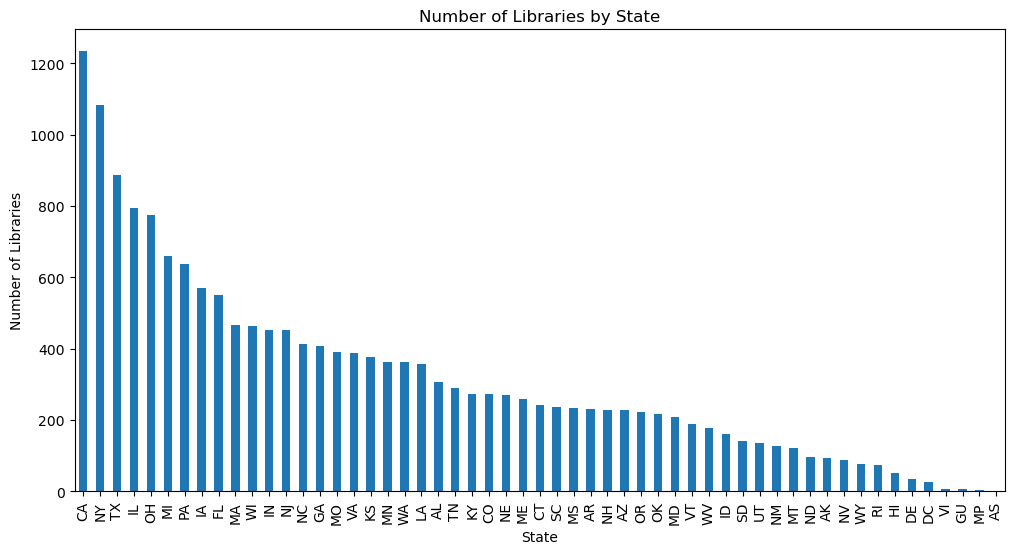

In [29]:
# Bar Chart of Libraries by State (STABR)
plt.figure(figsize=(12, 6))
library_by_state = data_iso['STABR'].value_counts()
library_by_state.plot(kind='bar')
plt.title('Number of Libraries by State')
plt.xlabel('State')
plt.ylabel('Number of Libraries')
plt.show()

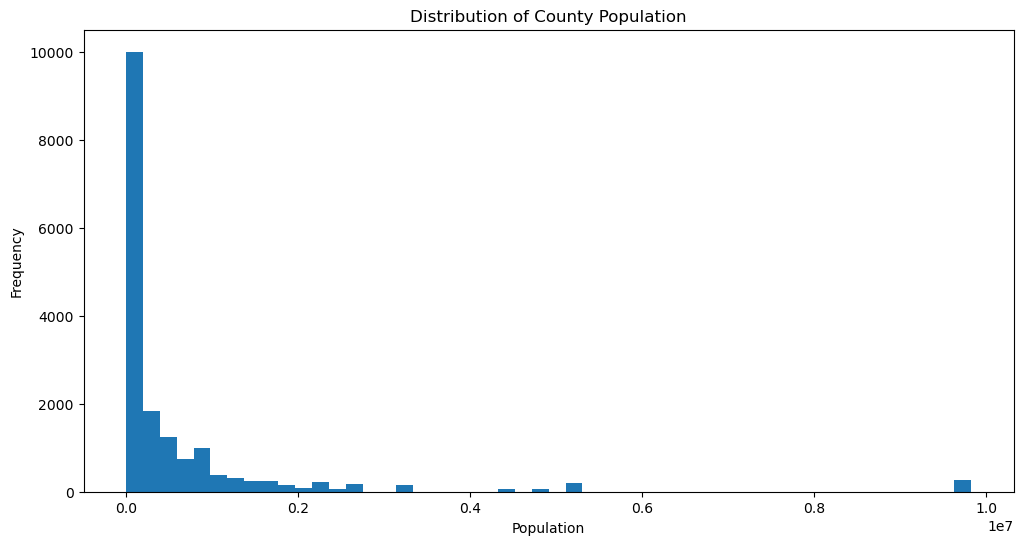

In [20]:
# Advanced Analysis
# More complex analyses go here, such as regression, correlations, etc.

# Interactive Visualizations (basic example with matplotlib, for interactive use libraries like Plotly)
plt.figure(figsize=(12, 6))
data_iso['CNTYPOP'].hist(bins=50)
plt.title('Distribution of County Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [21]:
# Analysis: Average weekly hours by locale
avg_hours_by_locale = data_iso.groupby('LOCALE')['HOURS'].mean()
print(avg_hours_by_locale)

LOCALE
11    1404.587024
12    1583.595474
13    1715.555118
21    1841.429042
22    1701.239171
23    1768.298883
31    1785.044759
32    1851.525015
33    1813.888314
41    1536.835946
42    1357.450525
43    1215.217037
Name: HOURS, dtype: float64


In [22]:
# Interactive Visualization: Average Weekly Hours by Locale
avg_hours_by_locale = data_iso.groupby('LOCALE')['HOURS'].mean().reset_index()
fig_avg_hours = px.bar(avg_hours_by_locale,
                       x='LOCALE',
                       y='HOURS',
                       labels={'HOURS': 'Average Weekly Hours'},
                       title='Average Weekly Hours by Locale')
fig_avg_hours.show()


In [24]:
# Interactive Map: Geographical Distribution of Libraries
fig_geo_distribution = px.scatter_geo(data_iso,
                                      lon='LONGITUD',
                                      lat='LATITUDE',
                                      hover_name='LIBNAME',
                                      title='Geographical Distribution of Libraries',
                                      labels={'LATITUDE': 'Latitude', 'LONGITUD': 'Longitude'})
fig_geo_distribution.update_geos(projection_type="natural earth")
fig_geo_distribution.show()

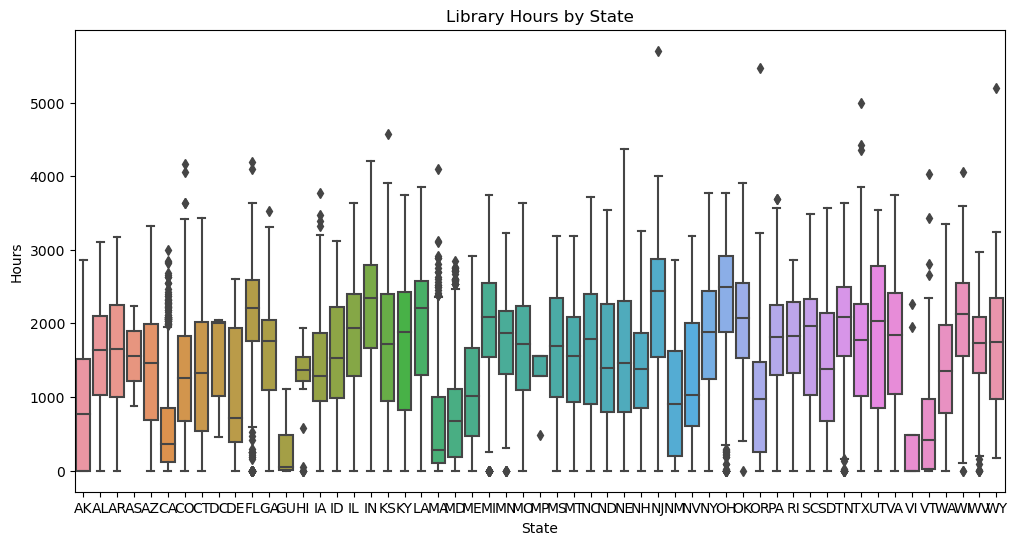

In [31]:
# Box Plot of Library Hours by State
plt.figure(figsize=(12, 6))
sns.boxplot(x='STABR', y='HOURS', data=data_iso)
plt.title('Library Hours by State')
plt.xlabel('State')
plt.ylabel('Hours')
plt.show()

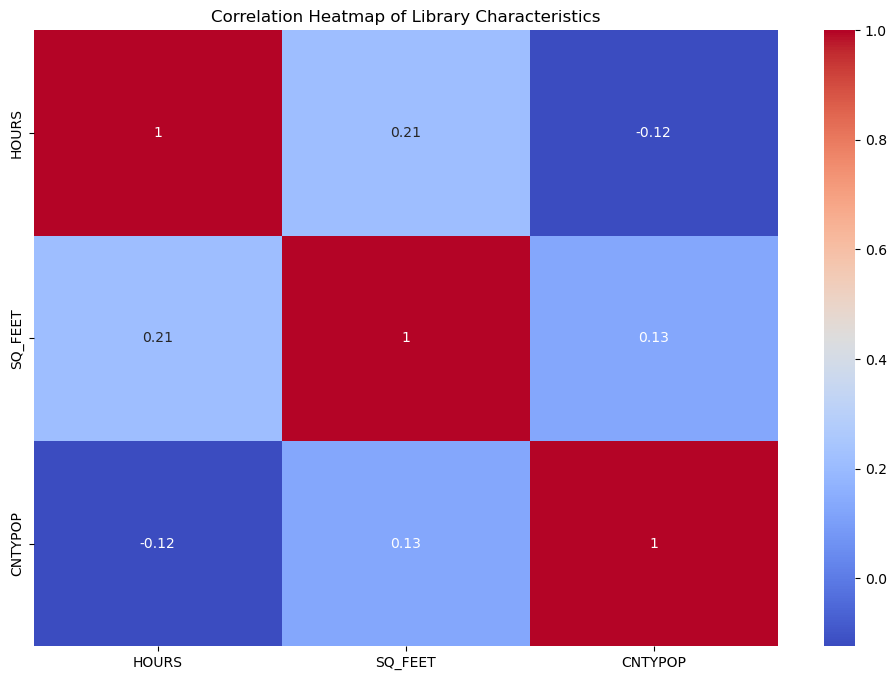

In [27]:
# Heatmap of Library Characteristics
plt.figure(figsize=(12, 8))
sns.heatmap(data_iso[['HOURS', 'SQ_FEET', 'CNTYPOP']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Library Characteristics')
plt.show()

After analyzing the library data for fiscal year 2021, several key insights have emerged:

Geographical Distribution: Libraries are distributed across various counties and states, with some states having a higher concentration of libraries than others.
Library Characteristics: The dataset provides information on library size (in square feet), weekly hours open, and county population. Libraries vary widely in size and operating hours, reflecting the diverse needs and resources of different communities.
Service Offerings: The majority of libraries provide traditional services, while some offer specialized services or serve specific demographics. Understanding the types of services offered by libraries can help tailor programs and resources to meet community needs effectively.
Population and Usage: There is a correlation between county population and library size, suggesting that libraries may adjust their facilities based on local population needs. Additionally, further analysis of library usage patterns, such as visitor demographics and borrowing trends, could provide insights into community engagement with library services.
Regional Differences: Variations in library characteristics and usage patterns exist between different regions and states. Factors such as population density, urbanization, and socioeconomic status may influence library demand and resources.